In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from glob import glob
import datetime
# from RaTag.core.wfm2read_fast import wfm2read

In [44]:
def get_mtime_differences(path_daq: Path):
    file_list = sorted(glob(str(path_daq / "*.wfm")))
    times = np.array(sorted([f.stat().st_mtime for f in map(Path, file_list)]))
    times = times - times[0]
    time_diff = (times[1:] - times[:-1])
    times = times[1:]
    return times, time_diff

def get_ctime_differences(path_daq: Path):
    file_list = sorted(glob(str(path_daq / "*.wfm")))
    times = np.array(sorted([f.stat().st_ctime for f in map(Path, file_list)]))
    times = times - times[0]
    time_diff = (times[1:] - times[:-1])
    times = times[1:]
    return times, time_diff

def get_atime_differences(path_daq: Path):
    file_list = sorted(glob(str(path_daq / "*.wfm")))
    times = np.array(sorted([f.stat().st_atime for f in map(Path, file_list)]))
    times = times - times[0]
    time_diff = (times[1:] - times[:-1])
    times = times[1:]
    return times, time_diff

In [ ]:
file_list = sorted(glob(str(path_daq / "*.wfm")))
stat0 = Path(file_list[0]).stat()
stat1 = Path(file_list[1]).stat()
print(Path(file_list[0]).name)
print(Path(file_list[1]).name)
print('File 0:', stat0.st_mtime, stat0.st_atime, stat0.st_ctime)
print('File 1:', stat1.st_mtime, stat1.st_atime, stat1.st_ctime)

RUN22_20260112_Gate0800_Anode2700_P7_1000Wfm.wfm
RUN22_20260112_Gate0800_Anode2700_P7_1001Wfm.wfm
File 0: 1768211056.0 1768211056.0 1768211053.63
File 1: 1768211062.0 1768211062.0 1768211058.68


In [45]:
path_daq = Path("E:\Pablos_Mighty_measurements\RUN22_Th228\FieldScan_Gate0800_Anode2700")
mtime_diff, mtimes = get_mtime_differences(path_daq)
atime_diff, atimes = get_atime_differences(path_daq)
ctime_diff, ctimes = get_ctime_differences(path_daq)

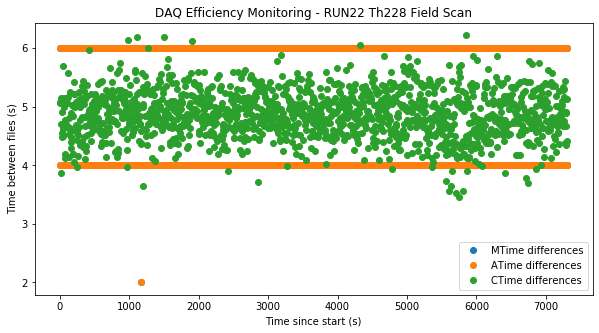

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(mtime_diff, mtimes, 'o', label='MTime differences')
plt.plot(atime_diff, atimes, 'o', label='ATime differences')
plt.plot(ctime_diff, ctimes, 'o', label='CTime differences')
plt.gca().set(xlabel='Time since start (s)', ylabel='Time between files (s)',
              title='DAQ Efficiency Monitoring - RUN22 Th228 Field Scan')
plt.legend()

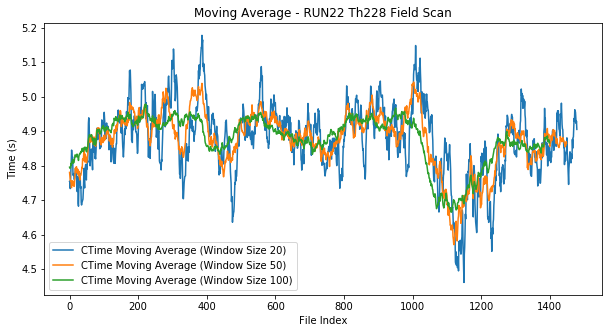

In [63]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
# mtimes_moving_avg = moving_average(mtimes, window_size)
# atimes_moving_avg = moving_average(atimes, window_size)
# plt.plot(mtimes_moving_avg, label='MTime Moving Average')
# plt.plot(atimes_moving_avg, label='ATime Moving Average')
window_size1 = 20
window_size2 = 50
window_size3 = 100
ctimes_movavg1 = moving_average(ctimes, window_size1)
ctimes_movavg2 = moving_average(ctimes, window_size2)
ctimes_movavg3 = moving_average(ctimes, window_size3)
plt.figure(figsize=(10, 5))
plt.plot(ctimes_movavg1, label=f'CTime Moving Average (Window Size {window_size1})')
plt.plot(ctimes_movavg2, label=f'CTime Moving Average (Window Size {window_size2})')
plt.plot(ctimes_movavg3, label=f'CTime Moving Average (Window Size {window_size3})')
plt.gca().set(xlabel='File Index', ylabel='Time (s)', title='Moving Average - RUN22 Th228 Field Scan')
plt.legend()

In [ ]:
total_avg = np.mean(ctimes)
std_dev = np.std(ctimes)
print(f"Average time between files: {total_avg:.4f} +- {std_dev:.4f} s")
total_files = len(mtimes) + 1
total_time = np.sum(ctimes)
current_count = 300
print(f"Current count: {current_count}, Total files: {total_files}, Total time: {total_time/3600:.2f} hours")
remaining_files = total_files - current_count
estimated_time_remaining = remaining_files * total_avg
est_time_dt = datetime.timedelta(seconds=estimated_time_remaining)
print(f"Estimated time remaining for {remaining_files} files: {est_time_dt}")

Average time between files: 4.8732 +- 0.3924 s
Current count: 300, Total files: 1500, Total time: 2.03 hours
Estimated time remaining for 1200 files: 1:37:27.810540
